# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
html_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
titles = html_soup.find_all('th')
list_titles = []
# Loop through the scraped data to create a list of rows
for title in titles:
    list_titles.append(title.text)
list_titles

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(columns=list_titles)

for row in html_soup.find_all('tr', class_='data-row'):
    data = row.find_all('td')
    values = [td.text.strip() for td in data]
    mars_df.loc[len(mars_df)] = values

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months = mars_df['month'].nunique()
print(f'In total, {months} months')

In total, 12 months


In [13]:
# 2. How many Martian days' worth of data are there?
days_total = mars_df['id'].max() - mars_df['id'].min()
print(f'In total, scientists collected {days_total} days of data since landing (assuming one measurement per day)')

In total, scientists collected 1893 days of data since landing (assuming one measurement per day)


In [14]:
# 3. What is the average low temperature by month?
avg_low_month = []
for m in range(1, months+1):
    template_avg_low = {"month":"", "avg_low_T":""}
    avg_low = mars_df.loc[mars_df['month']==m]['min_temp'].mean()
    template_avg_low['month'] = m
    template_avg_low['avg_low_T'] = round(avg_low, 5)
    avg_low_month.append(template_avg_low)
avg_low_month_df = pd.DataFrame(avg_low_month, columns=['month', 'avg_low_T'])
avg_low_month_df

,month,avg_low_T
0,1,-77.16092
1,2,-79.93258
2,3,-83.30729
3,4,-82.74742
4,5,-79.30872
5,6,-75.29932
6,7,-72.28169
7,8,-68.38298
8,9,-69.17164
9,10,-71.98214


Text(0, 0.5, 'Temperature in Celsius')

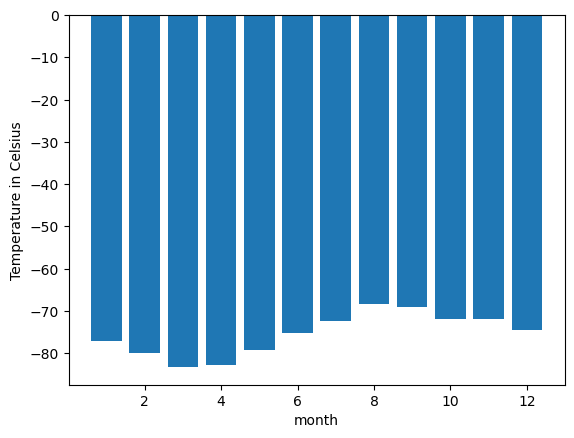

In [15]:
# Plot the average temperature by month
plt.bar(avg_low_month_df['month'], avg_low_month_df['avg_low_T'])
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

In [16]:
# Identify the coldest and hottest months in Curiosity's location
coldest_T =avg_low_month_df['avg_low_T'].min()
hottest_T =avg_low_month_df['avg_low_T'].max()



#print(f'The coldest month by average temperature is month #{coldest_month}')
#print(f'On the other hand, the hottest month by average temperature is month #{hottest_month}')

In [27]:
# 4. Average pressure by Martian month
avg_prs_month = []
for p in range(1, months+1):
    template_prs = {"month":"", "avg_pressure":""}
    avg_prs = mars_df.loc[mars_df['month']==p]['pressure'].mean()
    template_prs['month'] = p
    template_prs['avg_pressure'] = round(avg_prs, 1)
    avg_prs_month.append(template_prs)
avg_prs_month_df = pd.DataFrame(avg_prs_month, columns=['month', 'avg_pressure'])
avg_prs_month_df


,month,avg_pressure
0,1,862.5
1,2,889.5
2,3,877.3
3,4,806.3
4,5,748.6
5,6,745.1
6,7,795.1
7,8,873.8
8,9,913.3
9,10,887.3


Text(0, 0.5, 'Atmospheric Pressure in Pascals')

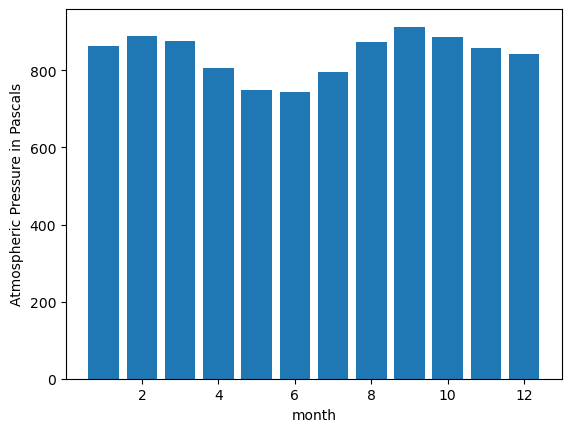

In [29]:
# Plot the average pressure by month
plt.bar(avg_prs_month_df['month'], avg_prs_month_df['avg_pressure'])
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure in Pascals")

Text(0, 0.5, 'ls')

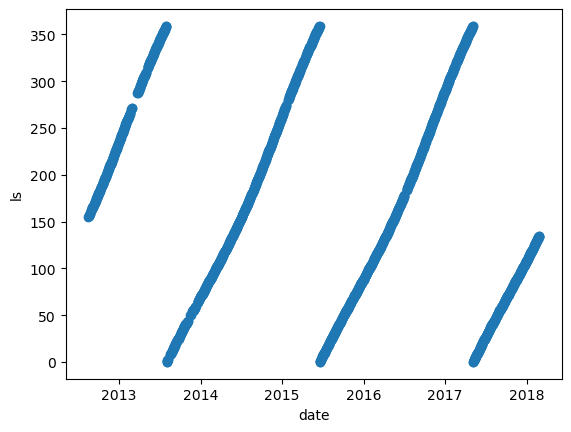

In [35]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.scatter(mars_df['terrestrial_date'], mars_df['ls'])
plt.xlabel("date")
plt.ylabel("ls")

In [52]:
#Finding the minimum for ls and the relates indexes to find the date
start_year_date = []
start_ls = mars_df['ls'].min()
#start_year
for i, j in enumerate(mars_df['ls']):
    if j == start_ls:
        start_year_date.append(mars_df['terrestrial_date'][i])

304
305
925
926
1579
1580


In [62]:
mars_df["terrestrial_date"][305]

Timestamp('2013-08-02 00:00:00')

In [55]:
#Finding the maximum for ls and the relates indexes to find the date

end_year_date = []
end_ls = mars_df['ls'].max()
for i, j in enumerate(mars_df['ls']):
    if j == end_ls:
        end_year_date.append(mars_df['terrestrial_date'][i]) 

In [53]:
 start_year_date

[Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-08-02 00:00:00'),
 Timestamp('2015-06-19 00:00:00'),
 Timestamp('2015-06-20 00:00:00'),
 Timestamp('2017-05-06 00:00:00'),
 Timestamp('2017-05-07 00:00:00')]

In [67]:
# Create dataframe with start/end of the Marsian year

mars_year_df = pd.DataFrame({'start_date': start_year_date, 'end_date': end_year_date})
mars_year_df

,start_date,end_date
0,2013-08-01,2013-07-30
1,2013-08-02,2013-07-31
2,2015-06-19,2015-06-17
3,2015-06-20,2015-06-18
4,2017-05-06,2017-05-04
5,2017-05-07,2017-05-05


In [70]:
mars_year = mars_year_df['end_date'][3] - mars_year_df['start_date'][0]
print(f"Mars's year takes approximately {mars_year} of terrestial days")

Mars's year takes approximately 686 days 00:00:00 of terrestial days


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [71]:
# Write the data to a CSV
mars_df.to_csv('mars_results.csv',index=False)

In [73]:
browser.quit()


KeyboardInterrupt

